In [1]:
import numpy as np 
import matplotlib.pyplot as plt

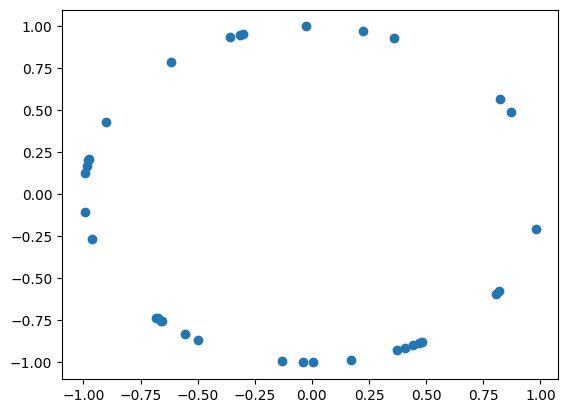

In [13]:
square=np.loadtxt("config.out")

plt.scatter(square[:,0],square[:,1])
plt.show()